# Loading all the librabries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Loading Dataframe 

In [2]:
df = pd.read_csv("training_set.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Finding NULL values from the DataSet


In [3]:
col_list = list(df.columns)

null_value = {i:[df[i].isna().sum(), str(df[i].dtype)] for i in col_list if df[i].isna().sum()!=0}

null_value

{'LotFrontage': [259, 'float64'],
 'Alley': [1369, 'object'],
 'MasVnrType': [8, 'object'],
 'MasVnrArea': [8, 'float64'],
 'BsmtQual': [37, 'object'],
 'BsmtCond': [37, 'object'],
 'BsmtExposure': [38, 'object'],
 'BsmtFinType1': [37, 'object'],
 'BsmtFinType2': [38, 'object'],
 'Electrical': [1, 'object'],
 'FireplaceQu': [690, 'object'],
 'GarageType': [81, 'object'],
 'GarageYrBlt': [81, 'float64'],
 'GarageFinish': [81, 'object'],
 'GarageQual': [81, 'object'],
 'GarageCond': [81, 'object'],
 'PoolQC': [1453, 'object'],
 'Fence': [1179, 'object'],
 'MiscFeature': [1406, 'object']}

# Understanding the Description of the Dataset

To remove the null value we first check wheather null value are true null or absence of values, meaning it might 
happen for certain feature that absence of certain value mean null in case of python. To make changes we look into the data 
description

After looking at the description we found that
in following column names NA has meaning of not present of certain parameter:

1. Alley
2. MasVnrType
3. BsmtQual
4. BsmtCond
5. BsmtExposure
6. BsmtFinType1
7. BsmtFinType2
8. Electrical
9. FireplaceQu
10. GarageType
11. GarageFinish
12. GarageQual
13. GarageCond
14. PoolQC
15. Fence
16. MiscFeature

Now that we know for column with categorical values we fill NA with appropriate response and for categorical values we 
fill it with mean values

In [4]:
na_cat = {
  'Alley': 'No alley access',
 'MasVnrType':'None',
 'BsmtQual' : 'No Basement',
 'BsmtCond': 'No Basement',
 'BsmtExposure':'No Basement',
 'BsmtFinType1':'No Basement',
 'BsmtFinType2': 'No Basement',
 'Electrical': df.Electrical.mode()[0] ,
 'FireplaceQu': 'No Fireplace',
 'GarageType' :'No Garage',
 'GarageFinish': 'No Garage',
 'GarageQual' : 'No Garage',
 'GarageCond' :'No Garage',
 'PoolQC' : 'No Pool',
 'Fence': 'No Fence',
 'MiscFeature' : 'None' 
}

# Creating replace function non-true Null Values

To replace null values we can use a simple function 

In [5]:
def missing_significance(dataframe, dictionary):
        for i in dictionary:
            dataframe[i]= dataframe[i].fillna(dictionary[i])
        return dataframe

In [6]:
missing_significance(df, na_cat)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125


# Cleaning of the Data

In [7]:
def clean_function(dataframe):
    dataframe.columns =    [i.replace(' ','_').replace('.','').lower() for i in list(dataframe.columns)]
    return dataframe

In [8]:
clean_function(df)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125


# Data Preprocessing

We are using the below function to replace true null values from a data frame, Generally, we replace all numeric features with mean values and mode values for categorical features. In addition, this function can replace missing values with particular values. To do so, we only need to pass in the dictionary with the feature name as key and value to be replaced with as value in the dictionary.

In [9]:
def fillna_auto(dataframe, dictionary = None):
    if dictionary == None:
        for i in list(dataframe.columns):
            if (df[i].dtype == float) or (df[i].dtype == int):
                dataframe[i]= dataframe[i].fillna(dataframe[i].mean())
            elif (df[i].dtype == object):
                dataframe[i]= dataframe[i].fillna(dataframe[i].mode()[0])
    else:
        for i in dictionary:
            dataframe[i]= dataframe[i].fillna(dictionary[i])
       
    return dataframe

In [10]:
def auto_encoding (dataframe, dictionary = None):
    
    tmp_dict = {i:dataframe[i].value_counts().to_dict() for i in list(dataframe.columns) if dataframe[i].dtype == object}
    
    for d1, d2 in tmp_dict.items():
        for i in range(len(d2)):
            tmp_dict[d1][list(d2.keys())[i]] = i

    if  dictionary == None:
        for i in tmp_dict:
            dataframe[i].replace(tmp_dict[i], inplace = True)       
    else:
        for i in dictionary:
            dataframe[i].replace(dictionary[i], inplace = True)  
    return dataframe

In [11]:
auto_encoding(df)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,2,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,2,1,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


In [12]:
{i:[df[i].isna().sum(), str(df[i].dtype)] for i in list(df.columns) if df[i].dtype == float or df[i].dtype == int}

{'lotfrontage': [259, 'float64'],
 'masvnrarea': [8, 'float64'],
 'garageyrblt': [81, 'float64']}

In [13]:
fillna_auto(df)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,2,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,2,1,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


In [14]:
{i:[df[i].isna().sum(), str(df[i].dtype)] for i in list(df.columns) if df[i].isna().sum() != 0}

{}

# Selection of Best Feature for the Algorithm 

## Forward feature selection

In [15]:
x = df.drop('saleprice',axis=1)
y = df[['saleprice']]

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=25)

In [17]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [18]:
sfs = SequentialFeatureSelector(lin_model,direction='forward')
sfs.fit(xtrain,ytrain)
array = sfs.get_support()
feature_select = pd.DataFrame(array,index=x.columns)
feature_select 

,0
id,True
mssubclass,True
mszoning,True
lotfrontage,False
lotarea,True
...,...
miscval,False
mosold,False
yrsold,False
saletype,True


In [19]:
true_feature = feature_select[feature_select.iloc[:,0]==True]
true_feature

,0
id,True
mssubclass,True
mszoning,True
lotarea,True
street,True
utilities,True
neighborhood,True
condition1,True
housestyle,True
overallqual,True


In [20]:
df1 = list(true_feature.index)
df1

['id',
 'mssubclass',
 'mszoning',
 'lotarea',
 'street',
 'utilities',
 'neighborhood',
 'condition1',
 'housestyle',
 'overallqual',
 'overallcond',
 'yearremodadd',
 'masvnrarea',
 'exterqual',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'grlivarea',
 'bsmtfullbath',
 'fullbath',
 'bedroomabvgr',
 'kitchenqual',
 'totrmsabvgrd',
 'functional',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagecars',
 'paveddrive',
 'wooddecksf',
 'screenporch',
 'miscfeature',
 'saletype',
 'salecondition']

In [21]:
x=df[df1]
x

,id,mssubclass,mszoning,lotarea,street,utilities,neighborhood,condition1,housestyle,overallqual,...,fireplacequ,garagetype,garagefinish,garagecars,paveddrive,wooddecksf,screenporch,miscfeature,saletype,salecondition
0,1,60,0,8450,0,0,1,0,1,7,...,0,0,1,2,0,0,0,0,0,0
1,2,20,0,9600,0,0,22,1,0,6,...,2,0,1,2,0,298,0,0,0,0
2,3,60,0,11250,0,0,1,0,1,7,...,2,0,1,2,0,0,0,0,0,0
3,4,70,0,9550,0,0,11,0,1,7,...,1,1,0,3,0,0,0,0,0,2
4,5,60,0,14260,0,0,13,0,1,8,...,2,0,1,3,0,192,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,7917,0,0,5,0,1,6,...,2,0,1,2,0,0,0,0,0,0
1456,1457,20,0,13175,0,0,8,0,0,6,...,2,0,0,2,0,349,0,0,0,0
1457,1458,70,0,9042,0,0,11,0,1,7,...,1,0,1,1,0,0,0,1,0,0
1458,1459,20,0,9717,0,0,0,0,0,5,...,0,0,0,1,0,366,0,0,0,0


In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=25)

In [23]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [24]:
#Training Evalution
ypredtrain = lin_model.predict(xtrain)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

adj_r2 = 1 - ((1-R_squared)*(len(xtrain) - 1)/ (len(xtrain)-len(x.columns) - 1))
print('adj_r2:',adj_r2)

R_squared: 0.8358635379091784
adj_r2: 0.8296344501637962


In [25]:
#Testing Evalution
ypredtest = lin_model.predict(xtest)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

adj_r2 = 1 - ((1-R_squared)*(len(xtest) - 1)/ (len(xtest)-len(x.columns) - 1))
print('adj_r2:',adj_r2)           

R_squared: 0.8041610665058545
adj_r2: 0.7799834203954662


In [26]:
df1 = df.drop('id',axis=1)
df1

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,0,3,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,0,1,0,0,1,...,0,0,0,0,0,2,2006,0,2,140000
4,60,0,84.0,14260,0,0,1,0,0,3,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,2,1,2500,5,2010,0,0,266500
1458,20,0,68.0,9717,0,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


## Backward feature selection

In [27]:
sfs = SequentialFeatureSelector(lin_model,direction='backward')
sfs.fit(xtrain,ytrain)
array = sfs.get_support()
feature_select = pd.DataFrame(array,index=x.columns)
feature_select 

,0
id,False
mssubclass,True
mszoning,True
lotarea,True
street,True
utilities,False
neighborhood,True
condition1,True
housestyle,False
overallqual,True


In [51]:
true_feature = feature_select[feature_select.iloc[:,0]==True]
true_feature

,0
mssubclass,True
mszoning,True
lotarea,True
street,True
neighborhood,True
condition1,True
overallqual,True
yearremodadd,True
masvnrarea,True
exterqual,True


In [28]:
df2 = list(true_feature.index)
df2

['id',
 'mssubclass',
 'mszoning',
 'lotarea',
 'street',
 'utilities',
 'neighborhood',
 'condition1',
 'housestyle',
 'overallqual',
 'overallcond',
 'yearremodadd',
 'masvnrarea',
 'exterqual',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'grlivarea',
 'bsmtfullbath',
 'fullbath',
 'bedroomabvgr',
 'kitchenqual',
 'totrmsabvgrd',
 'functional',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagecars',
 'paveddrive',
 'wooddecksf',
 'screenporch',
 'miscfeature',
 'saletype',
 'salecondition']

In [30]:
x=df[df2]
x

,id,mssubclass,mszoning,lotarea,street,utilities,neighborhood,condition1,housestyle,overallqual,...,fireplacequ,garagetype,garagefinish,garagecars,paveddrive,wooddecksf,screenporch,miscfeature,saletype,salecondition
0,1,60,0,8450,0,0,1,0,1,7,...,0,0,1,2,0,0,0,0,0,0
1,2,20,0,9600,0,0,22,1,0,6,...,2,0,1,2,0,298,0,0,0,0
2,3,60,0,11250,0,0,1,0,1,7,...,2,0,1,2,0,0,0,0,0,0
3,4,70,0,9550,0,0,11,0,1,7,...,1,1,0,3,0,0,0,0,0,2
4,5,60,0,14260,0,0,13,0,1,8,...,2,0,1,3,0,192,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,7917,0,0,5,0,1,6,...,2,0,1,2,0,0,0,0,0,0
1456,1457,20,0,13175,0,0,8,0,0,6,...,2,0,0,2,0,349,0,0,0,0
1457,1458,70,0,9042,0,0,11,0,1,7,...,1,0,1,1,0,0,0,1,0,0
1458,1459,20,0,9717,0,0,0,0,0,5,...,0,0,0,1,0,366,0,0,0,0


In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=30)

In [32]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [33]:
#Training Evalution
ypredtrain = lin_model.predict(xtrain)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

adj_r2 = 1 - ((1-R_squared)*(len(xtrain) - 1)/ (len(xtrain)-len(x.columns) - 1))
print('adj_r2:',adj_r2)

R_squared: 0.8279077588556302
adj_r2: 0.8213767440114416


In [34]:
#Testing Evalution
ypredtest = lin_model.predict(xtest)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

adj_r2 = 1 - ((1-R_squared)*(len(xtest) - 1)/ (len(xtest)-len(x.columns) - 1))
print('adj_r2:',adj_r2)           

R_squared: 0.825596562982515
adj_r2: 0.804065274461838


In [35]:
def outlier_remove(dataframe,col):
    
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)

    IQR = q3 - q1
    upper_tail = q3 + 1.5 * IQR
    lower_tail = q1 - 1.5 * IQR
    
    dataframe[col].loc[(dataframe[col]>upper_tail)|(dataframe[col]<lower_tail)] = \
    dataframe[col].loc[(dataframe[col]<upper_tail)|(dataframe[col]>lower_tail)].mean()

<AxesSubplot:>

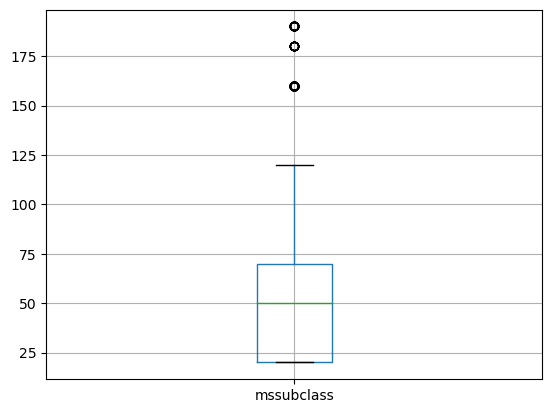

In [36]:
df[['mssubclass']].boxplot()

# Ridge

## 1.1 Grid Search CV

In [37]:
ridge_model = Ridge()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_ridge_model = GridSearchCV(ridge_model,hyp_grid,cv=5)

gscv_ridge_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])})

In [38]:
gscv_ridge_model.best_estimator_ 

Ridge(alpha=0.9899999999999995)

In [39]:
ridge_model = Ridge(alpha=0.9899999999999995)  
ridge_model.fit(xtrain,ytrain)

Ridge(alpha=0.9899999999999995)

In [40]:
# Training data evaluation
R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtrain)-1)/(len(xtrain)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: 0.8279077588556302
Adj.R Squared: 0.8213767440114416


In [41]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtest)-1)/(len(xtest)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: 0.8252656456180785
Adj.R Squared: 0.8036935031017919


## 1.2 Randomized search cv

In [42]:
ridge_model = Ridge()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

rscv_ridge_model = RandomizedSearchCV(ridge_model,hyp_grid,cv=5)

rscv_ridge_model.fit(xtrain,ytrain)

rscv_ridge_model.best_estimator_

Ridge(alpha=0.9299999999999996)

In [43]:
ridge_model = Ridge(alpha=0.9499999999999995)  
ridge_model.fit(xtrain,ytrain)

Ridge(alpha=0.9499999999999995)

In [44]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtrain)-1)/(len(xtrain)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: 0.8278742543939107
Adj.R Squared: 0.8213419680331483


In [45]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtest)-1)/(len(xtest)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: 0.8252769543099912
Adj.R Squared: 0.8037062079285086


# Lasso

## 1. Grid Seach CV

In [46]:
lasso_model = Lasso()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model,hyp_grid,cv=5)

gscv_lasso_model.fit(xtrain,ytrain)

gscv_lasso_model.best_estimator_

Lasso(alpha=0.9899999999999995)

In [47]:
lasso_model = Lasso(alpha=0.9899999999999995)  
lasso_model.fit(xtrain,ytrain)

Lasso(alpha=0.9899999999999995)

In [48]:
# Training data evaluation
ypredtrain = lasso_model.predict(xtrain)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtrain)-1)/(len(xtrain)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: 0.8279076801869362
Adj.R Squared: 0.8213766623572184


In [49]:
# Testing data evaluation
ypredtest = lasso_model.predict(xtest)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtest)-1)/(len(xtest)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: 0.8255999939128694
Adj.R Squared: 0.804069128963841


## 2.Randomized search cv

In [50]:
lasso_model = Lasso()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

rscv_lasso_model = RandomizedSearchCV(lasso_model,hyp_grid,cv=5)

rscv_lasso_model.fit(xtrain,ytrain)

rscv_lasso_model.best_estimator_

Lasso(alpha=0.9799999999999995)

In [51]:
lasso_model = Lasso(alpha=0.9099999999999996)  
lasso_model.fit(xtrain,ytrain)

Lasso(alpha=0.9099999999999996)

In [52]:
# Training data evaluation
R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtrain)-1)/(len(xtrain)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: 0.8279076801869362
Adj.R Squared: 0.8213766623572184


In [53]:
# Testing data evaluation
R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtest)-1)/(len(xtest)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: 0.8255999939128694
Adj.R Squared: 0.804069128963841


# Testing Result

In [76]:
df = pd.read_csv('testing_set.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [77]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [78]:
col_list = list(df.columns)

null_value = {i:[df[i].isna().sum(), str(df[i].dtype)] for i in col_list if df[i].isna().sum()!=0}

null_value

{'MSZoning': [4, 'object'],
 'LotFrontage': [227, 'float64'],
 'Alley': [1352, 'object'],
 'Utilities': [2, 'object'],
 'Exterior1st': [1, 'object'],
 'Exterior2nd': [1, 'object'],
 'MasVnrType': [16, 'object'],
 'MasVnrArea': [15, 'float64'],
 'BsmtQual': [44, 'object'],
 'BsmtCond': [45, 'object'],
 'BsmtExposure': [44, 'object'],
 'BsmtFinType1': [42, 'object'],
 'BsmtFinSF1': [1, 'float64'],
 'BsmtFinType2': [42, 'object'],
 'BsmtFinSF2': [1, 'float64'],
 'BsmtUnfSF': [1, 'float64'],
 'TotalBsmtSF': [1, 'float64'],
 'BsmtFullBath': [2, 'float64'],
 'BsmtHalfBath': [2, 'float64'],
 'KitchenQual': [1, 'object'],
 'Functional': [2, 'object'],
 'FireplaceQu': [730, 'object'],
 'GarageType': [76, 'object'],
 'GarageYrBlt': [78, 'float64'],
 'GarageFinish': [78, 'object'],
 'GarageCars': [1, 'float64'],
 'GarageArea': [1, 'float64'],
 'GarageQual': [78, 'object'],
 'GarageCond': [78, 'object'],
 'PoolQC': [1456, 'object'],
 'Fence': [1169, 'object'],
 'MiscFeature': [1408, 'object'],
 'S

## Replace Missing Values

In [79]:
na_cat = {
  'Alley': 'No alley access',
 'MasVnrType':'None',
 'BsmtQual' : 'No Basement',
 'BsmtCond': 'No Basement',
 'BsmtExposure':'No Basement',
 'BsmtFinType1':'No Basement',
 'BsmtFinType2': 'No Basement',
 'Electrical': df.Electrical.mode()[0] ,
 'FireplaceQu': 'No Fireplace',
 'GarageType' :'No Garage',
 'GarageFinish': 'No Garage',
 'GarageQual' : 'No Garage',
 'GarageCond' :'No Garage',
 'PoolQC' : 'No Pool',
 'Fence': 'No Fence',
 'MiscFeature' : 'None' 
}

In [80]:
def missing_significance(dataframe, dictionary):
        for i in dictionary:
            dataframe[i]= dataframe[i].fillna(dictionary[i])
        return dataframe

In [81]:
missing_significance(df, na_cat)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,...,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,...,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,No Pool,MnPrv,Shed,700,7,2006,WD,Normal


## Cleaning the data

In [82]:
def clean_function(dataframe):
    dataframe.columns =    [i.replace(' ','_').replace('.','').lower() for i in list(dataframe.columns)]
    return dataframe

In [83]:
clean_function(df)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,...,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,...,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,No Pool,MnPrv,Shed,700,7,2006,WD,Normal


In [84]:
auto_encoding(df)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,4.0,80.0,11622,0,0,0,0,0.0,...,120,0,0,1,0,0,6,2010,0.0,0
1,1462,20,0.0,81.0,14267,0,0,1,0,0.0,...,0,0,0,0,2,12500,6,2010,0.0,0
2,1463,60,0.0,74.0,13830,0,0,1,0,0.0,...,0,0,0,1,0,0,3,2010,0.0,0
3,1464,60,0.0,78.0,9978,0,0,1,0,0.0,...,0,0,0,0,0,0,6,2010,0.0,0
4,1465,120,0.0,43.0,5005,0,0,1,1,0.0,...,144,0,0,0,0,0,1,2010,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,21.0,1936,0,0,0,0,0.0,...,0,0,0,0,0,0,6,2006,0.0,0
1455,2916,160,1.0,21.0,1894,0,0,0,0,0.0,...,0,0,0,0,0,0,4,2006,0.0,2
1456,2917,20,0.0,160.0,20000,0,0,0,0,0.0,...,0,0,0,0,0,0,9,2006,0.0,2
1457,2918,85,0.0,62.0,10441,0,0,0,0,0.0,...,0,0,0,1,1,700,7,2006,0.0,0


In [85]:
f = {i:df[i].mean() for i in list(df.columns) if df[i].dtype == float or df[i].dtype == int}

In [86]:
fillna_auto(df, dictionary=f)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,4.0,80.0,11622,0,0,0,0,0.0,...,120,0,0,1,0,0,6,2010,0.0,0
1,1462,20,0.0,81.0,14267,0,0,1,0,0.0,...,0,0,0,0,2,12500,6,2010,0.0,0
2,1463,60,0.0,74.0,13830,0,0,1,0,0.0,...,0,0,0,1,0,0,3,2010,0.0,0
3,1464,60,0.0,78.0,9978,0,0,1,0,0.0,...,0,0,0,0,0,0,6,2010,0.0,0
4,1465,120,0.0,43.0,5005,0,0,1,1,0.0,...,144,0,0,0,0,0,1,2010,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,21.0,1936,0,0,0,0,0.0,...,0,0,0,0,0,0,6,2006,0.0,0
1455,2916,160,1.0,21.0,1894,0,0,0,0,0.0,...,0,0,0,0,0,0,4,2006,0.0,2
1456,2917,20,0.0,160.0,20000,0,0,0,0,0.0,...,0,0,0,0,0,0,9,2006,0.0,2
1457,2918,85,0.0,62.0,10441,0,0,0,0,0.0,...,0,0,0,1,1,700,7,2006,0.0,0


In [87]:
x = df.drop('saleprice',axis = 1)
y = df[['saleprice']]

KeyError: "['saleprice'] not found in axis"

In [ ]:
xtrain,xtest,ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=25)

In [88]:
pred_lin_model = LinearRegression()
pred_lin_model.fit(xtrain,ytrain)

LinearRegression()

In [89]:
# Training data evaluation
R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtrain)-1)/(len(xtrain)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: -0.8115705038684509
Adj.R Squared: -0.9544951984537331


In [90]:
# Testing data evaluation
R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_RSquared = 1- ((1-R_squared)*(len(xtest)-1)/(len(xtest)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

R_squared: -0.6318393339561421
Adj.R Squared: -1.0915123857747737


In [91]:
df[list(x.columns)]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,4.0,80.0,11622,0,0,0,0,0.0,...,120,0,0,1,0,0,6,2010,0.0,0
1,1462,20,0.0,81.0,14267,0,0,1,0,0.0,...,0,0,0,0,2,12500,6,2010,0.0,0
2,1463,60,0.0,74.0,13830,0,0,1,0,0.0,...,0,0,0,1,0,0,3,2010,0.0,0
3,1464,60,0.0,78.0,9978,0,0,1,0,0.0,...,0,0,0,0,0,0,6,2010,0.0,0
4,1465,120,0.0,43.0,5005,0,0,1,1,0.0,...,144,0,0,0,0,0,1,2010,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,21.0,1936,0,0,0,0,0.0,...,0,0,0,0,0,0,6,2006,0.0,0
1455,2916,160,1.0,21.0,1894,0,0,0,0,0.0,...,0,0,0,0,0,0,4,2006,0.0,2
1456,2917,20,0.0,160.0,20000,0,0,0,0,0.0,...,0,0,0,0,0,0,9,2006,0.0,2
1457,2918,85,0.0,62.0,10441,0,0,0,0,0.0,...,0,0,0,1,1,700,7,2006,0.0,0


In [92]:
predicted_value = pred_lin_model.predict(df[list(x.columns)])

In [93]:
df['saleprice'] = predicted_value

In [94]:
df[['id','saleprice']].to_csv('saleprediction.csv')                      

In [95]:
df[['id','saleprice']]

,id,saleprice
0,1461,102655.228431
1,1462,161536.976484
2,1463,156925.462816
3,1464,181148.572266
4,1465,202866.046576
...,...,...
1454,2915,67775.620054
1455,2916,75061.301778
1456,2917,158888.282589
1457,2918,99314.663813
